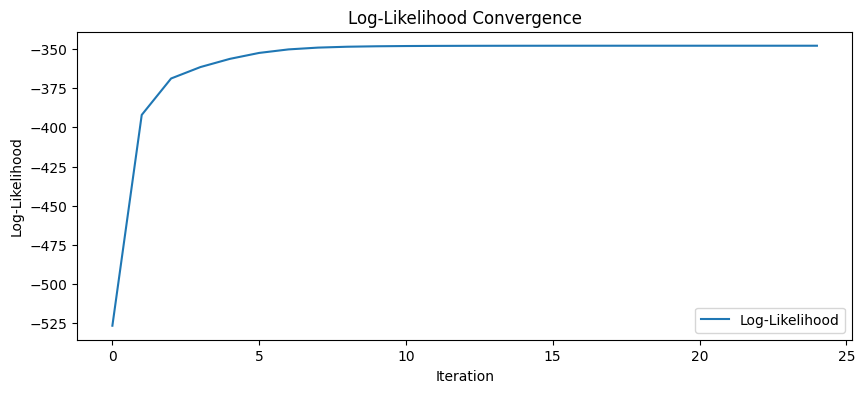

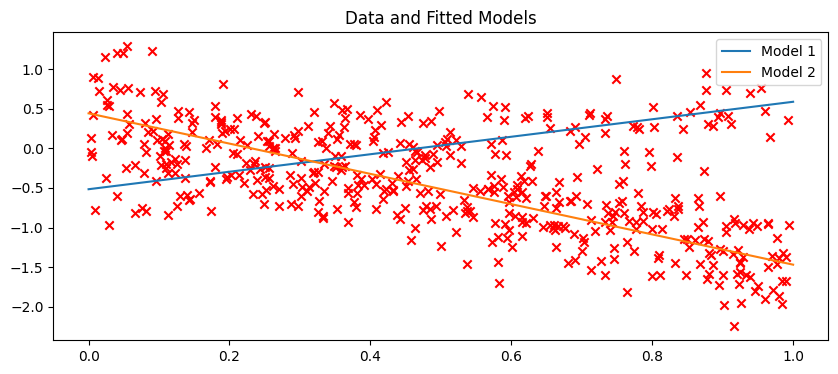

Converged after 25 iterations.
Estimated parameters:
Pi: [0.24136268 0.75863732]
Weights: [ 1.10460234 -1.91167818]
Biases: [-0.51628017  0.44221956]
Sigmas: [0.30038136 0.38985189]


In [ ]:
from __future__ import division
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

# Data generation
N = 500
x = np.random.rand(N)
#print(x)
pi0 = np.array([0.7, 0.3])
w0 = np.array([-2.0, 1.0])
b0 = np.array([0.5, -0.5])
sigma0 = np.array([.4, .3])

y = np.zeros_like(x)
for i in range(N):
    k = 0 if np.random.rand() < pi0[0] else 1
    y[i] = w0[k] * x[i] + b0[k] + np.random.randn() * sigma0[k]

# EM Algorithm Initialization
pi = np.array([0.5, 0.5])
w = np.array([1.0, -1.0])
b = np.array([0., 0.])
sigma = np.array([np.std(y), np.std(y)])

logLikelihoods = []
tolerance = 1e-4
logLikelihood = 0
iteration = 0
while True:
    # E-step: Calculate responsibilities
    gamma = np.zeros((N, 2))

    for k in range(2):
        gamma[:, k] = pi[k] * norm.pdf(y, loc=w[k] * x + b[k], scale=sigma[k])
    gamma /= gamma.sum(axis=1, keepdims=True)

    # Log-likelihood
    logLikelihood = 0
    for i in range(N):
        tempLikelihood = 0
        for k in range(2):
            tempLikelihood += pi[k] * norm.pdf(y[i], loc=w[k] * x[i] + b[k], scale=sigma[k])
        logLikelihood += np.log(tempLikelihood)

    logLikelihoods.append(logLikelihood)

    # Check for convergence
    if iteration > 0 and np.abs(logLikelihoods[-1] - logLikelihoods[-2]) < tolerance:
        break
    # M-step: Update parameters
    for k in range(2):
      sumPi = 0
      sumSigma = 0
      newSigma = 0
      wSum1 = np.zeros((2,2))
      wSum2 = np.zeros(2)
      for i in range(N):
        # Update pi & sigma
        sumPi += gamma[i][k]
        newSigma += gamma[i][k] * (y[i] - np.dot(np.transpose(w[k]), x[i]) - b[k])**2
        sumSigma += gamma[i][k]

        x_hat_i = np.array([x[i], 1])
        wSum1 += gamma[i, k] * np.outer(x_hat_i, x_hat_i)

        wSum2 += gamma[i, k] * y[i] * x_hat_i

      wSum1 += 1e-6 * np.eye(2)
      w_hat = np.matmul(np.linalg.inv(wSum1), wSum2)
      w[k], b[k] = w_hat[0], w_hat[1]
      pi[k] = sumPi/N
      sigma[k] =(newSigma/sumSigma)**(1/2)
    iteration+= 1



# Plot log-likelihood
plt.figure(figsize=(10, 4))
plt.plot(logLikelihoods, label='Log-Likelihood')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Convergence')
plt.legend()
plt.show()

# Plot the data and fitted models
plt.figure(figsize=(10, 4))
plt.scatter(x, y, c='r', marker='x')
x_line = np.linspace(0, 1, 100)
for k in range(2):
    plt.plot(x_line, w[k] * x_line + b[k], label=f'Model {k+1}')
plt.legend()
plt.title('Data and Fitted Models')
plt.show()

# Output estimated parameters
print("Converged after {} iterations.".format(len(logLikelihoods)))
print("Estimated parameters:")
print("Pi:", pi)
print("Weights:", w)
print("Biases:", b)
print("Sigmas:", sigma)